# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること.

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
x0 = symbols('x_0')
f, g, h = symbols('f g h', cls=Function)

Sympy で行列を釣るには `Matrix` オブジェクトを使う.
行列は行ベクトルのリストから作られる.
次の行列を作るコードは下記の通り.
\begin{align}
 \left[\begin{array}{cc}1 & -1\\3 & 4\\0 & 2\end{array}\right].
\end{align}

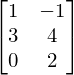

In [3]:
M = Matrix([[1, -1], [3, 4], [0, 2]])
display(M)

列ベクトルを作りやすくするには要素のリストを列ベクトルと思えばいい.

In [4]:
display(Matrix([1, 2, 3]))

行列は Sympy や Python の他のオブジェクトと同じように扱える.

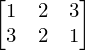

In [5]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
display(M)
display(N)
display(M*N)

# 注意
Sympy の行列は他の全ての Sympy のオブジェクトと違って可変なことに注意する.
不変な `Matrix` オブジェクトがほしい場合は `ImmutableMatrix` を使うこと.

# 基本的な操作
## 行列の型取得
行列に対する基本的な操作がある.
行列の型を知りたければ `shape` を使う.

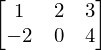

In [6]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
display(M)
display(M.shape)

## 行や列へのアクセス
行列に対して個別の行や列を得たいときは `row` や `col` を使う.
例えば `M.row(0)` は最初の行を取る.
`M.col(-1)` は最後の列を取る.

In [7]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
display(M.row(0))
display(M.col(-1))

## 行や列の追加・削除
行や列を削除するには `row_del()` や `col_del()` を使う.
これらはその行列自体を変更する.

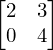

In [8]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M.col_del(0)
display(M)
M.row_del(1)
display(M)

行や列を追加するには `row_insert()` や `col_insert()` を使う.
これはその行列自体を変更**しない**.

In [12]:
M = Matrix([[2, 3]])
display(M)

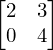

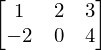

In [13]:
N = M.row_insert(1, Matrix([[0, 4]]))
display(M)
display(N)
N = N.col_insert(0, Matrix([1, -2]))
display(N)

# 以下注意
明示的に書かない限り以下のメソッドは自身に作用しない.
一般に自身に作用しないメソッドは新たな行列を返し自身に作用するメソッドは `None` を返す.

## 基本的なメソッド
既に説明したように和や積のような基本的な演算には `+`, `*`, `**` を使えばいい.
逆行列を見つけるには `M ** -1` のようにすればいい.
転置は `T` メソッドで.

In [ ]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
display(M)
display(N)
print('----')
display(M + N)
print('----')
display(M*N)
print('----')
display(3*M)
print('----')
display(M**2)
print('----')
display(M**-1)
print('----')
display(N**-1)

In [ ]:
天地

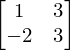

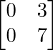

----


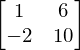

----


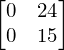

----


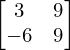

----


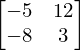

----


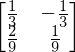

----


ValueError: Matrix det == 0; not invertible.

In [16]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
display(M)
display(M.T)

In [ ]:

Advanced Methods
Determinant

To compute the determinant of a matrix, use det.

>>> M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
>>> M
⎡1  0   1⎤
⎢        ⎥
⎢2  -1  3⎥
⎢        ⎥
⎣4  3   2⎦
>>> M.det()
-1

RREF

To put a matrix into reduced row echelon form, use rref. rref returns a tuple of two elements. The first is the reduced row echelon form, and the second is a list of indices of the pivot columns.

>>> M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
>>> M
⎡1   0   1   3 ⎤
⎢              ⎥
⎢2   3   4   7 ⎥
⎢              ⎥
⎣-1  -3  -3  -4⎦
>>> M.rref()
⎛⎡1  0   1    3 ⎤, [0, 1]⎞
⎜⎢              ⎥        ⎟
⎜⎢0  1  2/3  1/3⎥        ⎟
⎜⎢              ⎥        ⎟
⎝⎣0  0   0    0 ⎦        ⎠

Note

The first element of the tuple returned by rref is of type Matrix. The second is of type list.
Nullspace

To find the nullspace of a matrix, use nullspace. nullspace returns a list of column vectors that span the nullspace of the matrix.

>>> M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
>>> M
⎡1  2   3  0  0⎤
⎢              ⎥
⎣4  10  0  0  1⎦
>>> M.nullspace()
⎡⎡-15⎤, ⎡0⎤, ⎡ 1  ⎤⎤
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 6 ⎥  ⎢0⎥  ⎢-1/2⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 1 ⎥  ⎢0⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 0 ⎥  ⎢1⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣ 0 ⎦  ⎣0⎦  ⎣ 1  ⎦⎦

Columnspace

To find the columnspace of a matrix, use columnspace. columnspace returns a list of column vectors that span the columnspace of the matrix.

>>> M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
>>> M
⎡1  1  2⎤
⎢       ⎥
⎢2  1  3⎥
⎢       ⎥
⎣3  1  4⎦
>>> M.columnspace()
⎡⎡1⎤, ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣3⎦  ⎣1⎦⎦

Eigenvalues, Eigenvectors, and Diagonalization

To find the eigenvalues of a matrix, use eigenvals. eigenvals returns a dictionary of eigenvalue:algebraic multiplicity pairs (similar to the output of roots).

>>> M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
>>> M
⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦
>>> M.eigenvals()
{-2: 1, 3: 1, 5: 2}

This means that M has eigenvalues -2, 3, and 5, and that the eigenvalues -2 and 3 have algebraic multiplicity 1 and that the eigenvalue 5 has algebraic multiplicity 2.

To find the eigenvectors of a matrix, use eigenvects. eigenvects returns a list of tuples of the form (eigenvalue:algebraic multiplicity, [eigenvectors]).

>>> M.eigenvects()
⎡⎛-2, 1, ⎡⎡0⎤⎤⎞, ⎛3, 1, ⎡⎡1⎤⎤⎞, ⎛5, 2, ⎡⎡1⎤, ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

This shows us that, for example, the eigenvalue 5 also has geometric multiplicity 2, because it has two eigenvectors. Because the algebraic and geometric multiplicities are the same for all the eigenvalues, M is diagonalizable.

To diagonalize a matrix, use diagonalize. diagonalize returns a tuple (P,D)
, where D is diagonal and M=PDP−1

.

>>> P, D = M.diagonalize()
>>> P
⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦
>>> D
⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦
>>> P*D*P**-1
⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦
>>> P*D*P**-1 == M
True

Quick Tip

lambda is a reserved keyword in Python, so to create a Symbol called λ
, while using the same names for SymPy Symbols and Python variables, use lamda (without the b). It will still pretty print as λ

.

Note that since eigenvects also includes the eigenvalues, you should use it instead of eigenvals if you also want the eigenvectors. However, as computing the eigenvectors may often be costly, eigenvals should be preferred if you only wish to find the eigenvalues.

If all you want is the characteristic polynomial, use charpoly. This is more efficient than eigenvals, because sometimes symbolic roots can be expensive to calculate.

>>> lamda = symbols('lamda')
>>> p = M.charpoly(lamda)
>>> factor(p)
       2
(λ - 5) ⋅(λ - 3)⋅(λ + 2)